
## Data Science And Business Analytics
## Task #4 : Object detection / Optical Character Recognition (ORC) 
### Implement an object detector which identifies the classes of the objects in an image or video. OR Character detector which extracts printed or handwritten text from an image or video.
## The Sparks Foundation


## Author: Harshit Raj

### 1. Importing libraries

In [33]:

import cv2 

In [34]:
import matplotlib.pyplot as plt # pip install matplotlib

In [35]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [36]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [37]:
classLabels = [] ## empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())
    

In [38]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'pen']


In [39]:
print(len(classLabels))

81


In [40]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2 = 127.5
model.setInputMean((127.5,127.5,127.5)) ## mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 00000161E94FDA90>

### 2. Reading an image 

In [41]:
img = cv2.imread('sample_image.png')

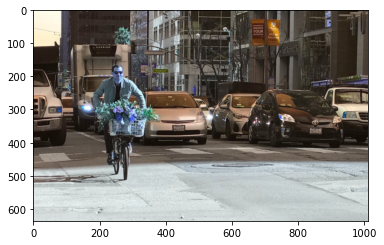

In [42]:
plt.imshow(img) ## bgr

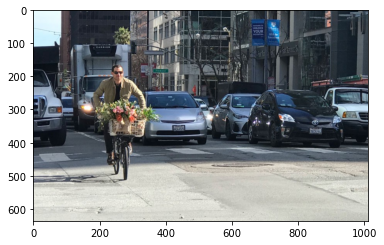

In [44]:
# Convert the image to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [45]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [46]:
print(ClassIndex)

[[ 3]
 [ 3]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 3]
 [ 2]
 [ 3]
 [ 3]
 [ 3]
 [ 8]
 [10]
 [64]]


In [47]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(img,boxes,(255, 0, 0), 2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)

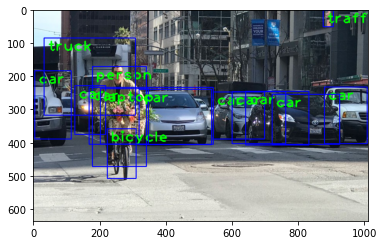

In [48]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video demo

In [ ]:
cap = cv2.VideoCapture("Car - 2165.mp4")

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)
             
            cv2.imshow('Object Detection Tutorial', frame)
            
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllwindows()

[[3]
 [3]]
[[3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]]
[[3]]
()
[[3]]
[[3]]
[[3]
 [3]]
[[3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]]
[[7]
 [3]
 [3]
 [3]]
[[7]
 [3]
 [3]
 [3]
 [3]]
[[7]
 [3]
 [3]
 [3]]
[[7]
 [3]
 [3]
 [3]
 [3]]
[[7]
 [3]
 [3]
 [3]


In [ ]:
cap = cv2.VideoCapture(1)

# check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open webcam")
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0, 255, 0),thickness=3)
             
            cv2.imshow('Object Detection Tutorial', frame)
            
            if cv2.waitKey(2) & 0xFF == ord('q'):
                break
cap.release()
cv2.destroyAllwindows()